___
## Ciência dos Dados - PROJETO 3 - INSPER

___
### Feito por: Theo Barbara, Abel Cavalcante, Gustavo Pierre e Victor Jurdi
___

# Wines Review

___

## A. INTRODUÇÃO

Para o Projeto 3 de Ciências dos Dados, o grupo escolheu trabalhar com vinhos. O nosso DataSet contém 10 variavéis(Pais de origem, descrição do vinho, designação, pontos na avaliação, preço, provincia, região, variedade e a adega produtora) e temos como objetivo procurar prever o preço do vinho através das variavéis mais qualificadas, que serão, o país, os pontos (nota do vinho) e o tipo da uva.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

### BASE DE DADOS

Em primeira instância, as bibliotecas foram importadas e os dadeos foram filtrados:

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from operator import itemgetter
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
x=pd.read_csv('winemag-data_first150k.csv')
del x["Unnamed: 0"]
x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Após isso, foi criado uma nova coluna com a frequência relativa dos tipos de uva. isso é feito pois, como há diversos vinhos extremamente raros, acabariam não fazendo tanta  relevância na nossa análise. Assim, os vinhos com frequência menor que 0.5% foram deletados do dataset.

In [3]:
dic = {}
dic2 = {}
lista = []
lista2=[]
i=0

for e in x.variety:
    if e not in dic:
        dic[e] = 1
    elif e in dic:
        dic[e] +=1

for e in dic:
    if dic[e] > 0:
        lista.append(dic[e]/len(dic))
        
for e in x.variety:
    if e not in dic2:
        dic2[e] = 1

for e in dic2:
    dic2[e] = lista[i]
    i+=1
    
for uva in x.variety:
    lista2.append(dic2[uva])
    
x["Frequencia"] = lista2
novo_x = x[x.Frequencia>0.5]

novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342


Por fim, criamos 

In [4]:
novo_x.loc[(novo_x.price<50),'Preço'] = 'Até 50'
novo_x.loc[(novo_x.price>50)&(novo_x.price<=200),'Preço'] = 'Até 200'
novo_x.loc[(novo_x.price>200)&(novo_x.price<=400),'Preço'] = 'Até 400'
novo_x.loc[(novo_x.price>400)&(novo_x.price<=600),'Preço'] = 'Até 600'
novo_x.loc[(novo_x.price>600)&(novo_x.price<=800),'Preço'] = 'Até 800'
novo_x.loc[(novo_x.price>800)&(novo_x.price<=1000),'Preço'] = 'Até 1000'
novo_x.loc[(novo_x.price>1000)&(novo_x.price<=1500),'Preço'] = 'Até 1500'
novo_x.loc[(novo_x.price>2000),'Preço'] = 'Mais que 2000'

novo_x.loc[(novo_x.points<=80),'Pontos'] = '80 pontos'
novo_x.loc[(novo_x.points>80)&(novo_x.points<=85),'Pontos'] = '81 - 85 pontos'
novo_x.loc[(novo_x.points>85)&(novo_x.points<=90),'Pontos'] = '86 - 90 pontos'
novo_x.loc[(novo_x.points>90)&(novo_x.points<=95),'Pontos'] = '91 - 95 pontos'
novo_x.loc[(novo_x.points>95)&(novo_x.points<=100),'Pontos'] = '95 - 100 pontos'

novo_x.head()

C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia,Preço,Pontos
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165,Até 400,95 - 100 pontos
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000,Até 200,95 - 100 pontos
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342,Até 200,95 - 100 pontos
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342,Até 200,91 - 95 pontos
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342,Até 200,91 - 95 pontos


### ANÁLISE DESCRITIVA

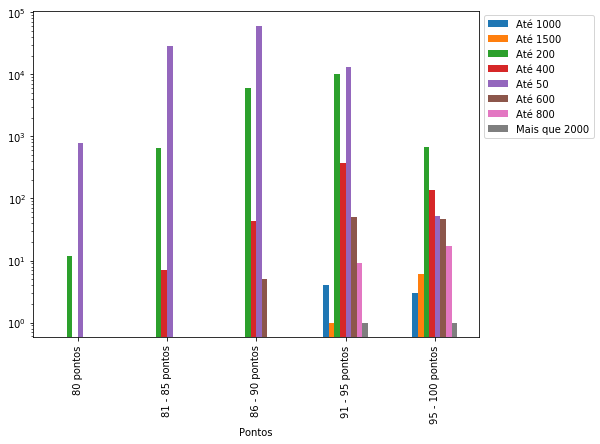

In [5]:
data = pd.crosstab(novo_x.Pontos, novo_x.Preço)
data.plot(kind='bar', figsize=(8,6));
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8));

In [6]:
novo_x.points.corr(novo_x.price)

0.4600421512441059

In [7]:
novo_x.Frequencia.corr(novo_x.price)

0.11149984361374775

In [8]:
novo_x.Frequencia.corr(novo_x.points)

0.06969229048694064

In [9]:
#plt.hist(novo_x["country"]);

In [10]:
#plt.hist(novo_x["Preço"]);

In [11]:
#plt.hist(novo_x.Pontos);

In [12]:
#plt.figure(figsize = (10, 10))
#sns.heatmap(novo_x.corr(), linewidth=0.5)
#plt.show()

___
## C. MODELOS DE PREDIÇÃO

In [13]:
novo_x = novo_x.dropna(subset=['price'])

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [14]:
seed = 569

X_train, X_test, y_train, y_test = train_test_split(novo_x, novo_x.price, random_state = seed)


media_price = np.mean(X_train.price)
print('O preço predito foi ${0}'.format(media_price))


O preço predito foi $33.77181114368242


In [15]:
z=0
for e in y_train:

    r= (e - media_price)**2
    z+=r
z
    
RMS_train=(z/len(y_train))**(1/2)

b=0
for e in y_test:

    rm= (e - media_price)**2
    b+=rm
b


RMS_test = (b/len(y_test))**(1/2)

print(RMS_train)
print(RMS_test)

36.58151231903599
38.2570032785192


![title](img/003c2e0e-26b4-4e73-8cea-6182eda838b2.png)

RMS_train = 36.58

RMS_test = 38.25


Nesse modelo fi = ȳ, portanto

R²=0

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [16]:
dummy = pd.get_dummies(novo_x['variety'])
dummy.head()

,Aglianico,Albariño,Barbera,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Carmenère,Champagne Blend,Chardonnay,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
novo_x = pd.concat([novo_x,dummy],axis=1)
novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,...,0,0,0,0,0,0,0,0,0,0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,...,1,0,0,0,0,0,0,0,0,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,...,0,0,0,0,0,0,0,0,0,0
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,...,0,0,0,0,0,0,0,0,0,0
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,...,0,0,0,0,0,0,0,0,0,0


In [18]:
novo_x2 = novo_x[['points', 'Aglianico', 'Albariño', 'Barbera',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Carmenère', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Corvina, Rondinella, Molinara',
       'Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera',
       'Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot',
       'Montepulciano', 'Moscato', 'Nebbiolo', "Nero d'Avola", 'Petite Sirah',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend',
       'Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé',
       'Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Tempranillo Blend',
       'Torrontés', 'Viognier', 'White Blend', 'Zinfandel']]
y = novo_x[['price']]

X_train, X_test, y_train, y_test = train_test_split(novo_x2, y, random_state = seed)

In [ ]:
erro = []
for k in range(1,5):
    clf = KNeighborsRegressor(k)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    erro.append(mean_squared_error(y_test,y_pred_test))



In [ ]:
lista = [1,2,3,4]
plt.scatter(lista, erro)

In [58]:
clf = KNeighborsRegressor(3)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test,y_pred_test))

print('Com K = 3, temos uma estabilização da medida de erro')

1142.7641396611152
Com K = 3, temos uma estabilização da medida de erro


o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [32]:
from sklearn.linear_model import LinearRegression

In [49]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
y_pred_test1 = regressor.predict(X_test)
y_pred_train1 = regressor.predict(X_train)




o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
regressor = DecisionTreeRegressor(random_state = seed)
regressor.fit(X_train, y_train)

y_pred_test2 = regressor.predict(X_test)
y_pred_train2=regressor.predict(X_train)

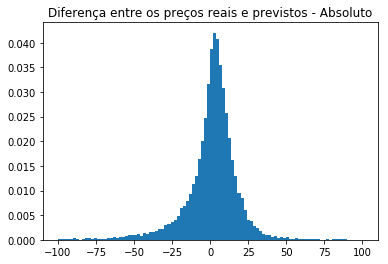

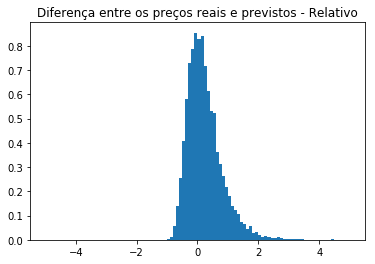

In [53]:
y_test_final=[]
for a in y_test.values:
    y_test_final.append(a[0])

y_test_final=np.array(y_test_final)
dif_abs = y_pred - y_test_final
dif_rel = (y_pred - y_test_final)/y_test_final

plt.hist(dif_abs, density = True, bins= 100, range=(-100,100));
plt.title("Diferença entre os preços reais e previstos - Absoluto")
plt.show();

plt.hist(dif_rel, density = True, bins= 100, range=(-5,5))
plt.title("Diferença entre os preços reais e previstos - Relativo")
plt.show();

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO


![title](img/003c2e0e-26b4-4e73-8cea-6182eda838b2.png)

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

o MODELO DE PREDIÇÃO PELA MÉDIA

##### Feito abaixo do modelo!

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [54]:
t=0
for e in y_train:
    
    rr=(e - y_pred_train)**2
    t+=rr
    
RMS_train =(t/len(y_train))**(1/2)

s=0
for e in y_test:
    
    re=(e - y_pred_test)**2
    s+=re
    
RMS_test =(s/len(y_test))**(1/2)

print(RMS_train)
print(RMS_test)


media_price = np.mean(X_train.price)

z=0
for e in y_train:

    r= (e - media_price)**2
    z+=r
    
r2=t/z

print(r2)

NameError: name 'y_pred_train' is not defined

RMS_train = 

RMS_test = 


R²=

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [55]:
v=0
for e in y_train:
    
    rr=(e - y_pred_train1)**2
    v+=rr
    
RMS_train =(t/len(y_train))**(1/2)

d=0
for e in y_test:
    
    re=(e - y_pred_test1)**2
    d+=re
    
RMS_test =(s/len(y_train))**(1/2)

print(RMS_train)
print(RMS_test)


media_price = np.mean(X_train.price)

k=0
for e in y_train:

    r= (e - media_price)**2
    k+=r
    
r2=v/k

print(r2)

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

RMS_train = 

RMS_test = 


R²=

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [56]:
f=0
for e in y_train:
    
    rr=(e - y_pred_train2)**2
    f+=rr
    
RMS_train =(t/len(y_train))**(1/2)

g=0
for e in y_test:
    
    re=(e - y_pred_test2)**2
    g+=re
    
RMS_test =(s/len(y_train))**(1/2)

print(RMS_train)
print(RMS_test)


media_price = np.mean(X_train.price)

k=0
for e in y_train:

    r= (e - media_price)**2
    k+=r
    
r2=f/k

print(r2)

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

RMS_train = 

RMS_test = 


R²=

___
## E. CONCLUSÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

Podemos perceber que este modelo é o pior

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f